Shape of Phi: (23, 2)
Lambda:
['12.018594050991279+0.0j', '0.0+0.0j']
['0.0+0.0j', '0.13427652333947288+0.0j']
Shape of X[:, 1:]: (23, 2)


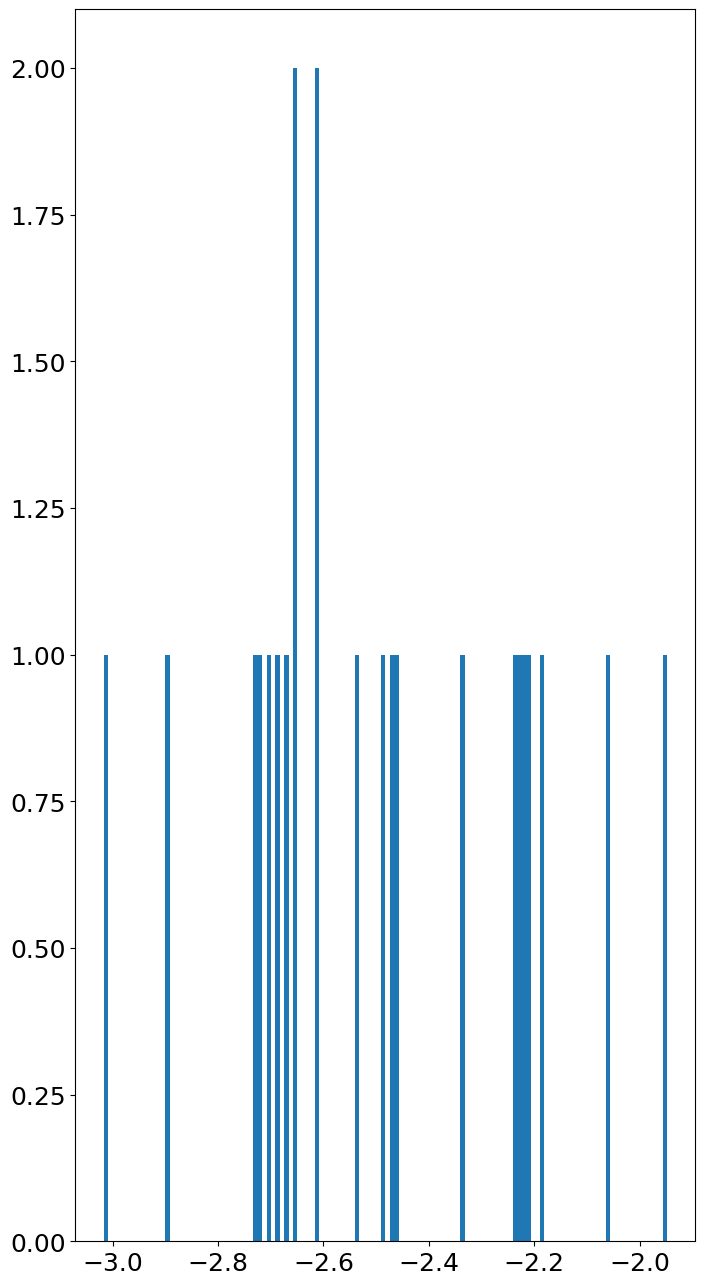

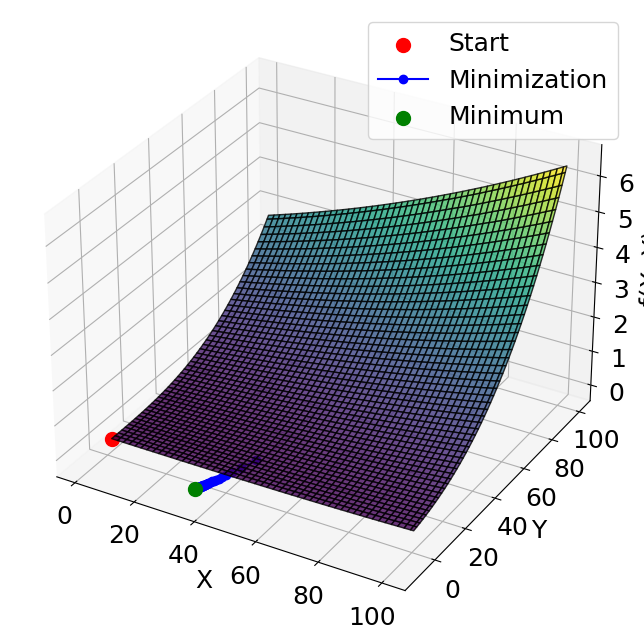

In [2]:
#Matematyka Konkretna
#Laboratorium 7
#Senecki Daniel https://github.com/Debenter/MKLab8
#Wariant 14

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 16]

def DMD(X, Xprime, r):
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)  # Step 1
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ Xprime @ VTr.T).T).T  # Step 2
    Lambda, W = np.linalg.eig(Atilde)  # Step 3
    Lambda = np.diag(Lambda)
    Phi = Xprime @ np.linalg.solve(Sigmar.T, VTr).T @ W  # Step 4
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    return Phi, Lambda, b

# Load matrices from CSV files
X = pd.read_csv('War14_X.csv', header=None, sep=';').select_dtypes(include=[np.number]).to_numpy()
Xprime = pd.read_csv('War14_Xprime.csv', header=None, sep=';').select_dtypes(include=[np.number]).to_numpy()

# Call the DMD function with your matrices
Phi, Lambda, b = DMD(X[:, :-1], X[:, 1:], 21)

# Debugging print statements
print("Shape of Phi:", Phi.shape)
print("Lambda:")
for row in Lambda:
    print([f"{entry.real}+{entry.imag}j" for entry in row])
print("Shape of X[:, 1:]:", X[:, 1:].shape)

# Modify the reshape operation based on the actual structure of Phi
V2 = np.real(Phi[:, 0][:199])

# Plot the histogram
plt.hist(V2.reshape(-1), 128)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Modified function to minimize
def funkcja(x, y):
    return (x + 3*y)**3 + 2*x

# Modified gradient descent function
def gradient_descent(learning_rate, iterations):
    x = np.random.uniform(1, 100)
    y = np.random.uniform(1, 100)

    history = []

    for _ in range(iterations):
        # Numerical gradients
        df_dx = 3 * (x + 3*y)**2 + 2  # Partial derivative with respect to x
        df_dy = 9 * (x + 3*y)**2      # Partial derivative with respect to y

        x = x - learning_rate * df_dx
        y = y - learning_rate * df_dy
        history.append([x, y, funkcja(x, y)])

    return np.array(history)

# Visualization of the function
x_vals = np.linspace(1, 100, 100)
y_vals = np.linspace(1, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funkcja(X, Y)

# 3D plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='k')

# Initial point
ax.scatter(1, 1, funkcja(1, 1), color='red', marker='o', s=100, label='Start')

# Optimization
learning_rate = 0.0001  # Adjust the learning rate to a smaller value
iterations = 100
history = gradient_descent(learning_rate, iterations)

# Trajectory
ax.plot(history[:, 0], history[:, 1], history[:, 2], color='blue', marker='o', label='Minimization')

# Final minimum point
ax.scatter(history[-1, 0], history[-1, 1], history[-1, 2], color='green', marker='o', s=100, label='Minimum')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()

plt.show()